In [15]:
from app.utils.preprocess import *

### Config

In [16]:
data_input_dir_str = "./Data/Raw/SageWrite_corpus_0.1_origin.csv"
data_output_dir_str = "./Data/Preprocessed/preprocessed.csv"

outline_columns_lst = ["outline_1", "outline_2", "outline_3"]

colnames_change_dict = {outline_columns_lst[0]: 'outline',
                   outline_columns_lst[1]: 'outline',
                   outline_columns_lst[2]: 'outline'}

name_replacement_dict = {1: 1, 2: 1, 3:1} 

In [17]:
data = pd.read_csv(data_input_dir_str)
data = split_data_add_type(data, "type")
data = concat_dfs(data, outline_columns_lst, colnames_change_dict)
data = data.replace(name_replacement_dict)

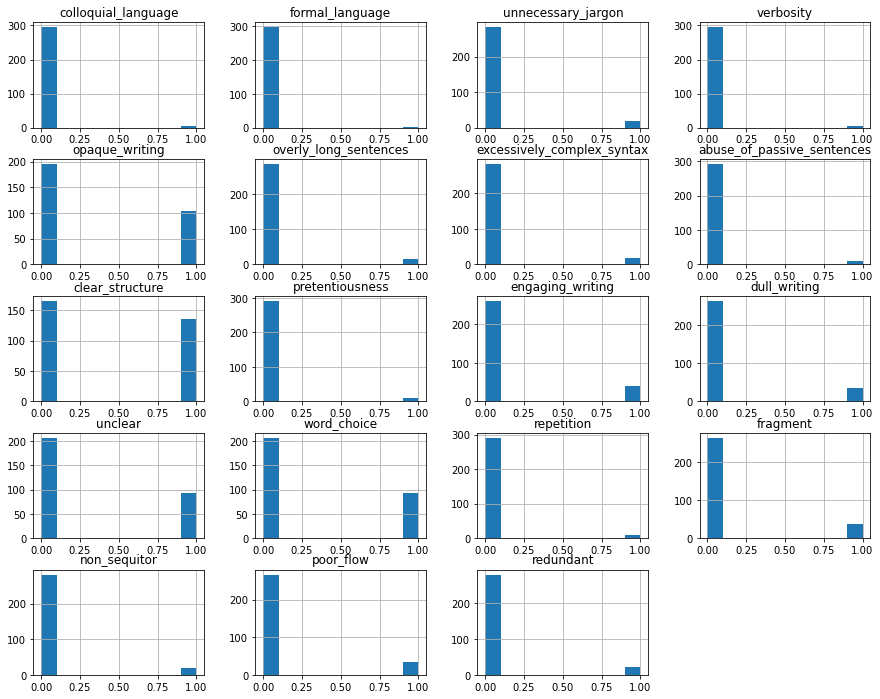

In [18]:
plot = data.drop(['sb_summary_id', 'original_text_id', 'original_text'], axis = 1).hist(figsize=(15, 12))

In [19]:
data = set_column_text_len(data, "outline")
data = set_column_text_len(data, "original_text")

<AxesSubplot:xlabel='outlineTokensLength'>

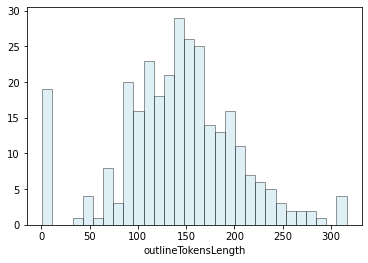

In [20]:
plot_column_distribution(data, "outlineTokensLength")

<AxesSubplot:xlabel='original_textTokensLength'>

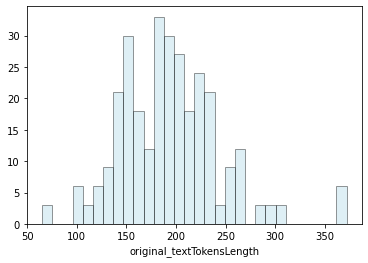

In [21]:
plot_column_distribution(data, "original_textTokensLength")

In [22]:
data = data[data.outlineTokensLength>20]
len(data)

281

In [23]:
#data[0:1]
data.reset_index(drop=True).to_csv(data_output_dir_str, index=False)